In [2]:
import pandas as pd
import numpy as np

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv('pima.csv', names=col_names, header=None)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = pima.drop(['skin','label'], axis=1)
y = pima['label']
X.shape, y.shape

((768, 7), (768,))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 7), (192, 7), (576,), (192,))

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred)
# Accuracy can be improved by tuning the parameters in Decision Tree Algo

0.7291666666666666

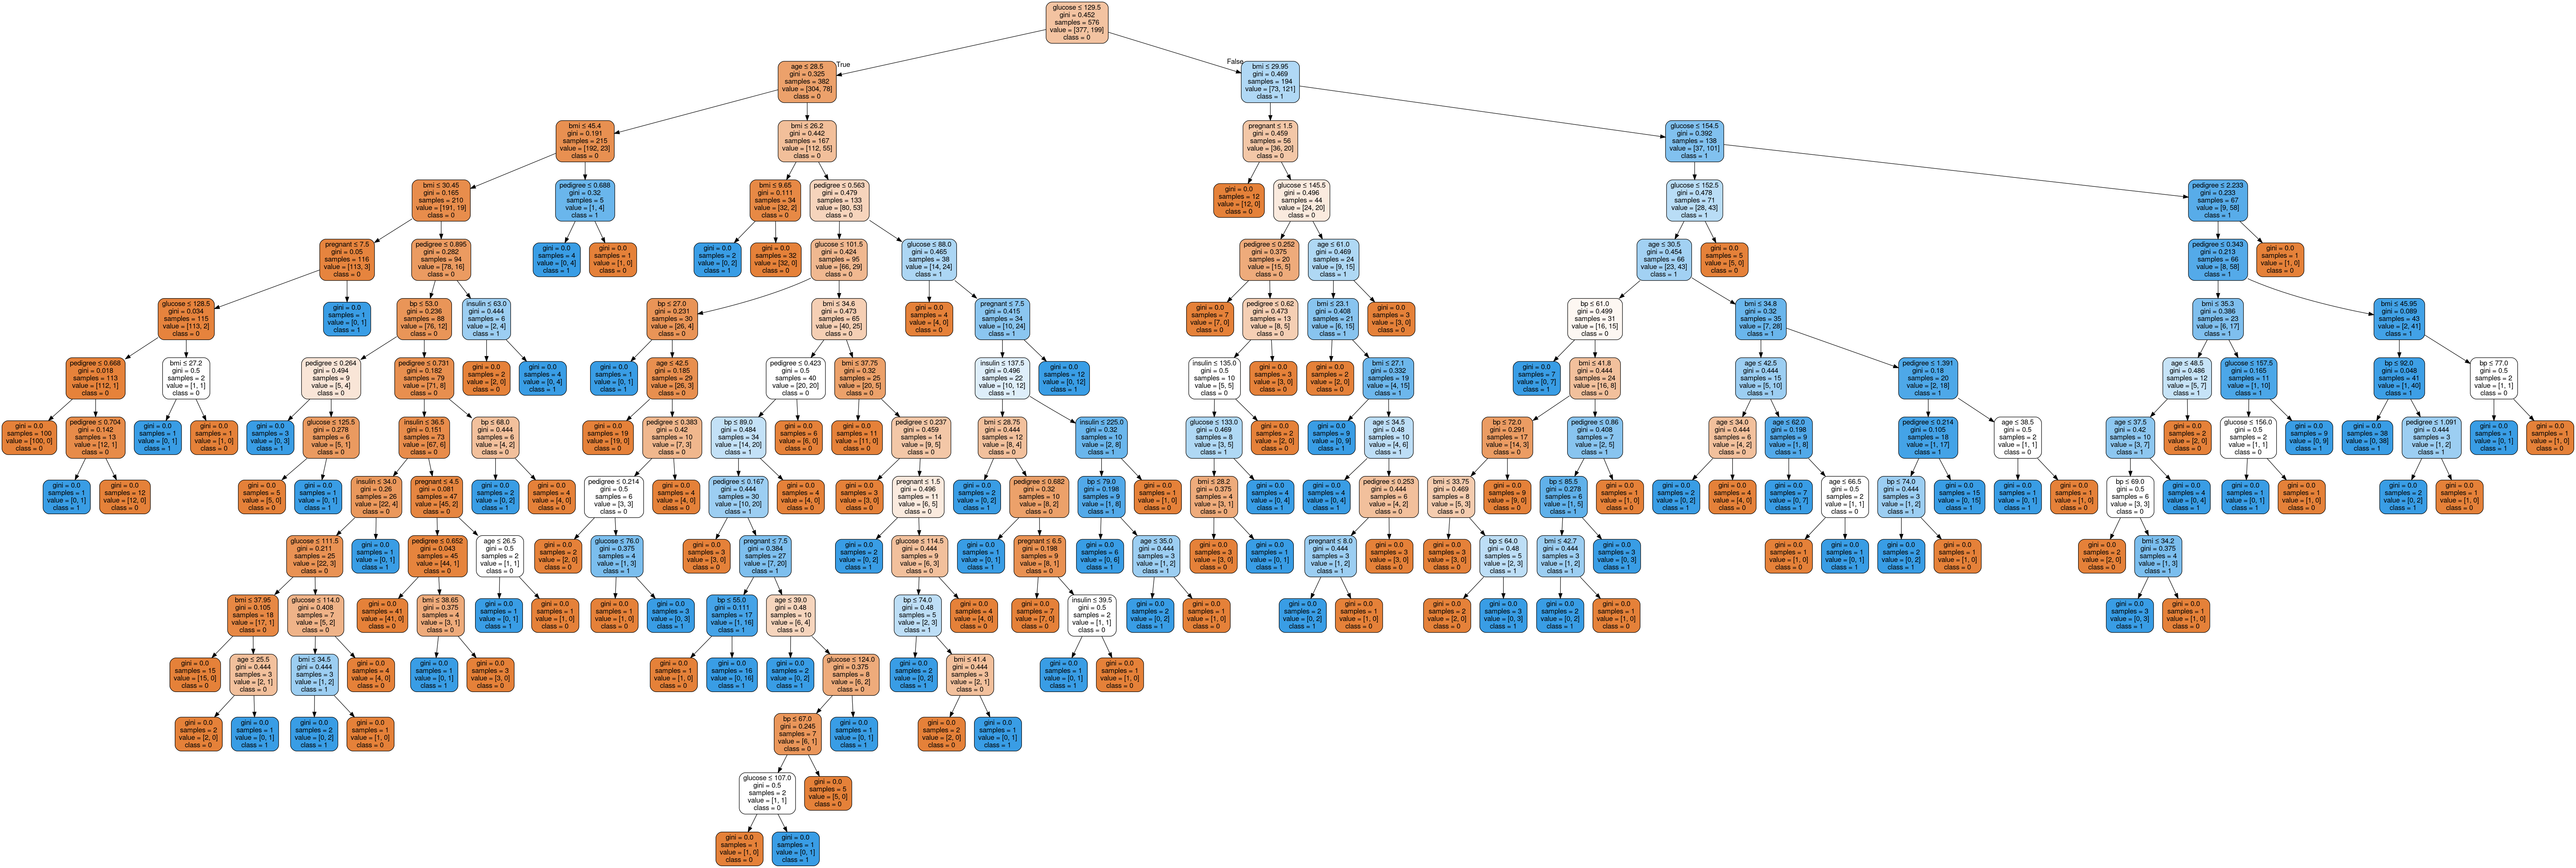

In [51]:
# Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True,
               rounded=True, special_characters=True, feature_names=feature_cols,
               class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes1.png')
Image(graph.create_png())

In [48]:
# Pruning the above tree (cutting off unnecessary nodes)
# Optimizing Decision Tree Performance

nclf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
nclf.fit(X_train, y_train)
y_pred = nclf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
# Increased Accuracy

0.7760416666666666

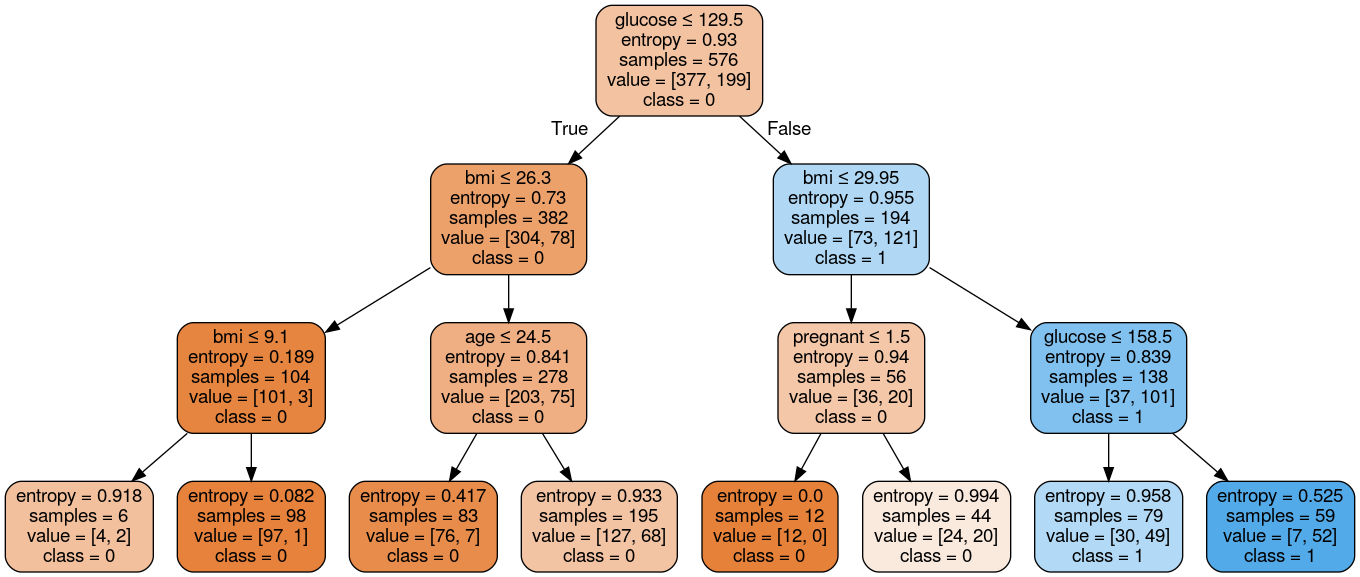

In [52]:
dot_data = StringIO()
export_graphviz(nclf, out_file=dot_data, filled=True,
               rounded=True, special_characters=True, feature_names=feature_cols,
               class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png())

# Explainable Tree